# Librería Pandas - Análisis de datos

Pandas es una librería de Python que nos ofrece una interfaz de alto nivel para manipular y analizar datos. La librería ofrece estructuras de datos flexibles sobre las que cargar los datos e implementa operaciones sobre estas estructuras que resultan muy intuitivas de usar y, a la vez, son eficientes. Por este motivo, es una de las herramientas más utilizadas en el análisis de datos en Python. Pandas también forma parte del SciPy stack.

In [1]:
# En la siguiente línea, importamos pandas y le damos un nombre más corto 
# para que nos sea más cómodo hacer las llamadas.
import pandas as pd
# Importamos también NumPy, ya que la usaremos en alguno de los ejemplos.
import numpy as np

### Estructuras de datos básicas
Pandas provee de tres estructuras de datos: la **serie**, el **dataframe** y antiguamente el panel (actualmente, los dataframes y las series con índices multinivel). Veamos las características de cada una de ellas.Una serie es un **vector unidimensional** con etiquetas en los ejes y datos homogéneos. Repasemos qué implican cada una de estas características con unos ejemplos.La serie nos permite representar un conjunto de datos unidimensionales, por ejemplo, una lista de enteros, decimales o de cadenas de caracteres: 

In [2]:
print(pd.Series([1, 1, 2, 3, 5]))

0    1
1    1
2    2
3    3
4    5
dtype: int64


In [3]:
print(pd.Series([1.5, 3.5, 4.75]))

0    1.50
1    3.50
2    4.75
dtype: float64


Los datos de una serie tienen que ser homogéneos, es decir, tienen que ser del mismo tipo. En los ejemplos anteriores, la primera serie está formada por enteros (int64) mientras que la segunda contiene números en punto flotante (float).

In [4]:
# Mezclamos enteros y floats, la serie es de tipo float.
print(pd.Series([1, 2, 3.5]))

0    1.0
1    2.0
2    3.5
dtype: float64


In [6]:
# Mezclamos enteros y floats, la serie es de tipo float.
print(pd.Series([1, None, 3.5, "Hola", True]))

0       1
1    None
2     3.5
3    Hola
4    True
dtype: object


 Por último, la serie puede tener etiquetas, de manera que podemos acceder a los elementos de una serie tanto a partir de su índice como de su etiqueta.

In [7]:
# Creamos una serie etiquetada a partir de un diccionario.
s = pd.Series({"alice" : 2, "bob": 3, "eve": 5})
print(s)

alice    2
bob      3
eve      5
dtype: int64


In [8]:
s['alice']

2

In [9]:
# Accedemos a los elementos de la serie a partir de su etiqueta.
print(s["alice"])

2


In [10]:
# Accedemos a los elementos de la serie a partir de su índice.
print(s[0])

2


In [11]:
# Creamos una serie etiquetada a partir de dos vectores, uno con los datos y otro con las etiquetas.
print(pd.Series([2, 3, 5], index = ["alice", "bob", "eve"]))

alice    2
bob      3
eve      5
dtype: int64


La segunda estructura de datos de pandas que presentaremos es el **dataframe**.Un dataframe es una tabla bidimensional con etiquetas en los ejes y datos potencialmente heterogéneos. El dataframe es la estructura principal de trabajo con la librería pandas.Veamos las características principales de un dataframe con algunos ejemplos.A diferencia de una serie, un dataframe es **bidimensional**:

In [12]:
print(pd.DataFrame([[1, 2, 3], [4, 5, 6]]))

   0  1  2
0  1  2  3
1  4  5  6


Al igual que la serie, el dataframe puede tener etiquetas en los ejes y podemos utilizar diferentes sintaxis para incluir las etiquetas en el dataframe.

In [13]:
# Utilizamos un diccionario para definir cada columna y una lista para indicar las etiquetas de las filas.
d = {"alice" : [1953, 12, 3], "bob" : [1955, 11, 24], "eve" : [2011, 10, 10]}
print(pd.DataFrame(d, index=["year", "month", "day"]))

       alice   bob   eve
year    1953  1955  2011
month     12    11    10
day        3    24    10


In [14]:
# Utilizamos una lista de listas para introducir los datos y dos listas adicionales 
# para indicar las etiquetas de filas y las columnas.
a = [[1953, 12, 3], [1955, 11, 24], [2011, 10, 10]]
print(pd.DataFrame(a, columns=["year", "month", "day"], index = ["alice", "bob", "eve"]))

       year  month  day
alice  1953     12    3
bob    1955     11   24
eve    2011     10   10


 Cada una de las columnas de un dataframe puede tener tipos de datos distintos, dando lugar a dataframes heterogéneos:

In [15]:
a = [[1953, "computer science", 3.5], [1955, "archeology", 3.8], [2011, "biology", 2.8]]
print(pd.DataFrame(a, columns=["year", "major", "average grade"], index = ["alice", "bob", "eve"]))

       year             major  average grade
alice  1953  computer science            3.5
bob    1955        archeology            3.8
eve    2011           biology            2.8


En versiones anteriores de pandas, disponíamos del **panel** como tercera estructura de datos. Un panel es una estructura de datos tridimensional que puede contener etiquetas en los ejes y puede ser heterogénea.

In [16]:
img = [[[0, 0, 0], [0, 15, 0], [0, 0, 15], [15, 0, 0], [180, 180, 180]],
       [[200, 200, 200], [125, 1, 125], [100, 100, 2], [1, 152, 125], [15, 25, 20]]]
       
# Utilizamos números para indexar filas y columnas, y las letras
# "R", "G", "B" para indicar el contenido de este color en cada píxel
index = pd.MultiIndex.from_product(
    [range(len(img)), range(len(img[0])), ["R", "G", "B"]], 
    names=['row', 'column', 'color'])

In [17]:
# Creamos la serie con el índice multidimensional especificando los datos
# y los índices
s = pd.Series([x for row in img for col in row for x in col], 
               index=index)
s

row  column  color
0    0       R          0
             G          0
             B          0
     1       R          0
             G         15
             B          0
     2       R          0
             G          0
             B         15
     3       R         15
             G          0
             B          0
     4       R        180
             G        180
             B        180
1    0       R        200
             G        200
             B        200
     1       R        125
             G          1
             B        125
     2       R        100
             G        100
             B          2
     3       R          1
             G        152
             B        125
     4       R         15
             G         25
             B         20
dtype: int64

Visualicemos gráficamente la imagen para entender mejor la representación escogida. La imagen tiene 2 filas y 5 columnas y para cada píxel utilizamos 3 valores numéricos para representar su color.

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


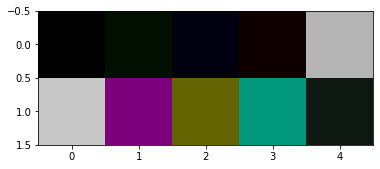

In [18]:
%pylab inline
from pylab import imshow
imshow(array(img, dtype=uint16), interpolation='nearest')

## Exploración del dataframe

In [19]:
# Cargamos los datos
data = pd.read_csv("carpeta_ficheros/data_marvel-wikia-data.csv")
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [20]:
data

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16371,657508,Ru'ach (Earth-616),\/Ru%27ach_(Earth-616),No Dual Identity,Bad Characters,Green Eyes,No Hair,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16372,665474,Thane (Thanos' son) (Earth-616),\/Thane_(Thanos%27_son)_(Earth-616),No Dual Identity,Good Characters,Blue Eyes,Bald,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16373,695217,Tinkerer (Skrull) (Earth-616),\/Tinkerer_(Skrull)_(Earth-616),Secret Identity,Bad Characters,Black Eyes,Bald,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16374,708811,TK421 (Spiderling) (Earth-616),\/TK421_(Spiderling)_(Earth-616),Secret Identity,Neutral Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN


In [21]:
data.index

RangeIndex(start=0, stop=16376, step=1)

## Indexación y selección de datos
 Podemos utilizar las expresiones habituales de Python (y NumPy) para seleccionar datos de dataframes o bien usar los operadores propios de pandas. Estos últimos están optimizados, por lo que su uso es recomendado para trabajar con conjuntos de datos grandes o en situaciones donde la eficiencia sea crítica.

In [22]:
data.columns

Index(['page_id', 'name', 'urlslug', 'ID', 'ALIGN', 'EYE', 'HAIR', 'SEX',
       'GSM', 'ALIVE', 'APPEARANCES', 'FIRST APPEARANCE', 'Year'],
      dtype='object')

In [33]:
# Seleccionamos los nombres de los diez primeros personajes, es decir, mostramos la columna "name" de 
# las diez primeras filas usando expresiones Python.
data['name'].head()

0              Spider-Man (Peter Parker)
1        Captain America (Steven Rogers)
2    Wolverine (James \"Logan\" Howlett)
3      Iron Man (Anthony \"Tony\" Stark)
4                    Thor (Thor Odinson)
Name: name, dtype: object

In [37]:
data['name'][0:10]

0              Spider-Man (Peter Parker)
1        Captain America (Steven Rogers)
2    Wolverine (James \"Logan\" Howlett)
3      Iron Man (Anthony \"Tony\" Stark)
4                    Thor (Thor Odinson)
5             Benjamin Grimm (Earth-616)
6              Reed Richards (Earth-616)
7             Hulk (Robert Bruce Banner)
8              Scott Summers (Earth-616)
9             Jonathan Storm (Earth-616)
Name: name, dtype: object

In [38]:
data.columns

Index(['page_id', 'name', 'urlslug', 'ID', 'ALIGN', 'EYE', 'HAIR', 'SEX',
       'GSM', 'ALIVE', 'APPEARANCES', 'FIRST APPEARANCE', 'Year'],
      dtype='object')

In [40]:
data.index

RangeIndex(start=0, stop=16376, step=1)

In [39]:
data.name # mejor siempre utilizar data['name']

0                  Spider-Man (Peter Parker)
1            Captain America (Steven Rogers)
2        Wolverine (James \"Logan\" Howlett)
3          Iron Man (Anthony \"Tony\" Stark)
4                        Thor (Thor Odinson)
                        ...                 
16371                     Ru'ach (Earth-616)
16372        Thane (Thanos' son) (Earth-616)
16373          Tinkerer (Skrull) (Earth-616)
16374         TK421 (Spiderling) (Earth-616)
16375                  Yologarch (Earth-616)
Name: name, Length: 16376, dtype: object

In [41]:
# Seleccionamos el nombre, el estado de identidad y el color de pelo de los superhéroes 3 y 8
# usando el operador de acceso de pandas .loc
data.loc[[3,8], ['name', 'ID', 'HAIR']]

,name,ID,HAIR
3,"Iron Man (Anthony \""Tony\"" Stark)",Public Identity,Black Hair
8,Scott Summers (Earth-616),Public Identity,Brown Hair


In [46]:
data['SEX'].sample(6)

5258       Male Characters
10622      Male Characters
14376      Male Characters
10396      Male Characters
8581     Female Characters
1404       Male Characters
Name: SEX, dtype: object

In [52]:
len(data[data['SEX'] == 'Male Characters'])
len(data[data['SEX'] == 'Female Characters'])

3837

In [53]:
len(data[data['SEX'] != 'Male Characters'])

4738

In [ ]:
# Seleccionamos filas según el género del superhéroe utilizando operadores binarios y expresiones Python.
male = data[data['SEX'] == 'Male Characters']
female = data[data['SEX'] == 'Female Characters']

In [54]:
# Observar los valores únicos
data.SEX.unique()

array(['Male Characters', 'Female Characters', 'Genderfluid Characters',
       'Agender Characters', nan], dtype=object)

In [56]:
data.ID

0         Secret Identity
1         Public Identity
2         Public Identity
3         Public Identity
4        No Dual Identity
               ...       
16371    No Dual Identity
16372    No Dual Identity
16373     Secret Identity
16374     Secret Identity
16375                 NaN
Name: ID, Length: 16376, dtype: object

In [55]:
data.columns

Index(['page_id', 'name', 'urlslug', 'ID', 'ALIGN', 'EYE', 'HAIR', 'SEX',
       'GSM', 'ALIVE', 'APPEARANCES', 'FIRST APPEARANCE', 'Year'],
      dtype='object')

In [58]:
# Combinamos operadores binarios para seleccionar los superhéroes con identidad secreta que han aparecido más
# de dos mil veces con expresiones Python.
secret_and_popular = data[(data.ID == 'Secret Identity') & (data.APPEARANCES > 2000)]
secret_and_popular['name']

0    Spider-Man (Peter Parker)
Name: name, dtype: object

In [60]:
# Alernativa con where
data.where((data.APPEARANCES > 2000) & (data.ID == "Secret Identity"))

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678.0,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
